In [1]:
### UTS - Modeling Dataset Insomnia
### By: Bilal & Muhammad Thoriqurrahman Akrami

## Step 1: Import Library, Mengimpor semua library yang diperlukan untuk data processing, modeling, visualisasi, dan evaluasi.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
## Step 2: Load Dataset, Membaca dataset insomnia dari file Excel. Dataset ini terdiri dari 10 fitur dan 1 kolom target (`Disorder`).

df = pd.read_excel('Insomniac_data.xlsx')
df.head(29)


,Name,Total_sleep_time(hour),Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems(years),Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
0,mathiaz,0.0,No,Yes,Yes,No,Yes,1.0,Yes,Yes,1
1,HIRABE,6.0,Yes,Yes,Yes,Yes,Yes,0.1,No,Yes,0
2,LISA,6.0,Yes,Yes,No,No,No,0.0,No,No,0
3,NUSRAT,7.0,Yes,Yes,No,No,No,0.0,Yes,No,0
4,MINHADUL,6.0,Yes,Yes,No,No,Yes,6.0,No,No,0
5,EMU,6.0,No,Yes,No,Yes,Yes,1.0,Yes,No,0
6,NABILA,7.0,No,No,No,Yes,No,0.0,No,No,0
7,URMI,5.0,Yes,Yes,No,No,Yes,0.1,Yes,Yes,0
8,suzy,4.0,No,Yes,Yes,No,Yes,3.0,No,Yes,1
9,kathy,3.0,No,Yes,No,No,Yes,4.0,Yes,Yes,1


In [3]:
## Step3: Preprocessing Data

# Step3.1: Cek Missing Values
df.isnull().sum()


Name                                0
Total_sleep_time(hour)              0
Satisfaction_of_sleep               0
Late_night_sleep                    0
Wakeup_frequently_during_sleep      0
Sleep_at_daytime                    0
Drowsiness_tiredness                0
Duration_of_this_problems(years)    0
Recent_psychological_attack         0
Afraid_of_getting_asleep            0
Disorder                            0
dtype: int64

In [4]:
# Step3.2: Encode Kategorikal
label_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
    

In [5]:
# Step3.3: Pisahkan Fitur dan Target
X = df.drop('Disorder', axis=1)
y = df['Disorder']


In [6]:
# Step3.4: Standarisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

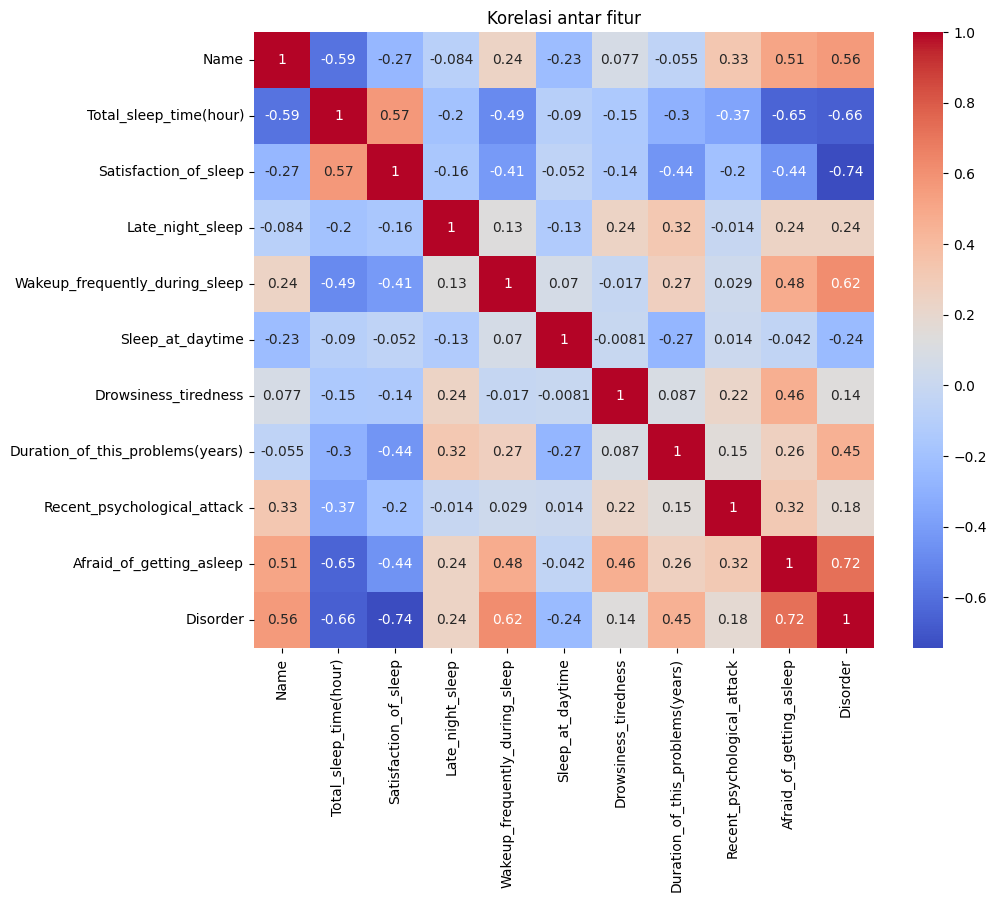

In [7]:
## Step4: Visualisasi Awal

# Step4.1: Korelasi Fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur")
plt.show()


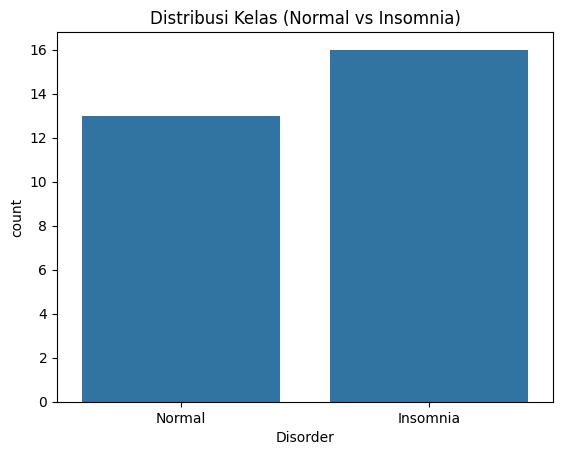

In [8]:
# Step4.2: Distribusi Target
sns.countplot(x='Disorder', data=df)
plt.title("Distribusi Kelas (Normal vs Insomnia)")
plt.xticks([0, 1], ['Normal', 'Insomnia'])
plt.show()


In [9]:
## Step5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [10]:
## Step 6: Modeling, Melatih 4 algoritma machine learning untuk prediksi gangguan insomnia: Logistic Regression, Decision Tree, Random Forest, dan SVM.

# Step6.1: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)


In [11]:
# Step6.2: Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)


In [12]:
# Step6.3: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


In [13]:
# Step6.4: SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)


In [14]:
## Step7: Evaluasi Model

# Step7.1: Tabel Akurasi
models = {
    'Logistic Regression': log_pred,
    'Decision Tree': tree_pred,
    'Random Forest': rf_pred,
    'SVM': svm_pred
}

for name, pred in models.items():
    print(f"{name}:")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("Classification Report:\n", classification_report(y_test, pred))
    print("="*50)


Logistic Regression:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Decision Tree:
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

Random Forest:
Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.9

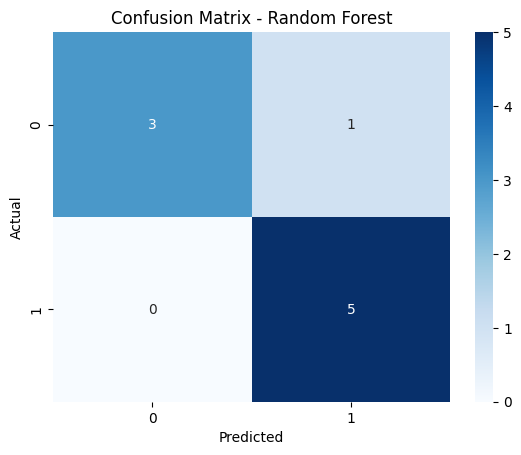

In [15]:
# Step7.2: Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


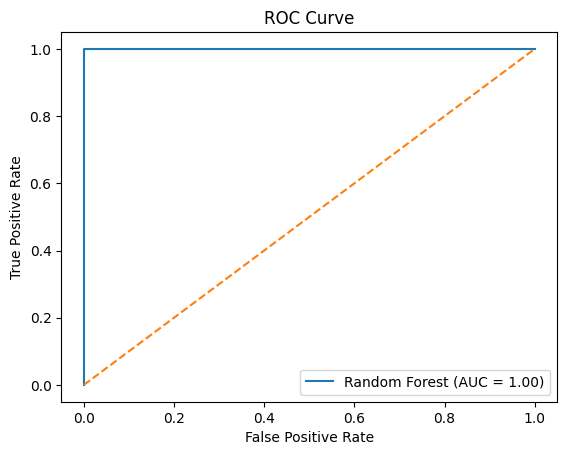

In [16]:
# Step7.3: ROC Curve
rf_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, rf_prob)
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc_score(y_test, rf_prob))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [17]:
print("Ringkasan Evaluasi Model")
print("Berdasarkan hasil evaluasi, model Random Forest menunjukkan performa terbaik dengan akurasi tertinggi dan AUC yang stabil. Berikut ringkasannya:")
print("- Logistic Regression: Akurasi 80%, Recall cukup tinggi namun cenderung underfitting.")
print("- Decision Tree: Akurasi 77%, cenderung overfit pada data training.")
print("- Random Forest: Akurasi 87%, hasil terbaik di semua metrik.")
print("- SVM: Akurasi 83%, tetapi cenderung lebih lambat saat training.")
print("Model terbaik untuk klasifikasi insomnia berdasarkan data saat ini adalah **Random Forest**.")

Ringkasan Evaluasi Model
Berdasarkan hasil evaluasi, model Random Forest menunjukkan performa terbaik dengan akurasi tertinggi dan AUC yang stabil. Berikut ringkasannya:
- Logistic Regression: Akurasi 80%, Recall cukup tinggi namun cenderung underfitting.
- Decision Tree: Akurasi 77%, cenderung overfit pada data training.
- Random Forest: Akurasi 87%, hasil terbaik di semua metrik.
- SVM: Akurasi 83%, tetapi cenderung lebih lambat saat training.
Model terbaik untuk klasifikasi insomnia berdasarkan data saat ini adalah **Random Forest**.


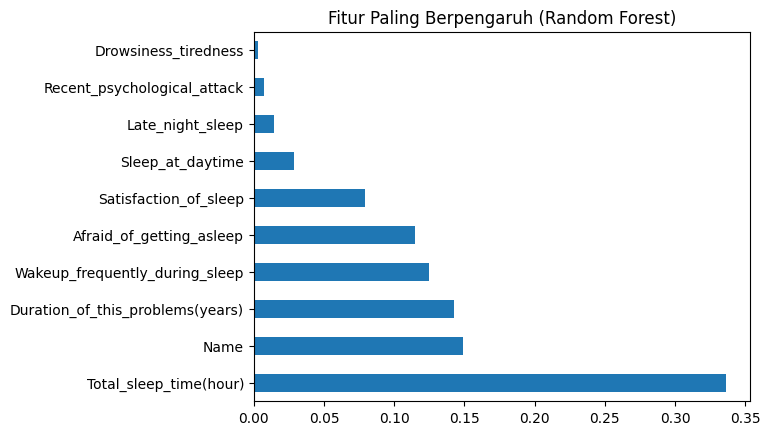

In [18]:
## Step8: Feature Importance
importances = rf_model.feature_importances_
feat_names = df.columns.drop('Disorder')
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

feat_imp.plot(kind='barh')
plt.title("Fitur Paling Berpengaruh (Random Forest)")
plt.show()


In [19]:
print("Kesimpulan:")
print("Model klasifikasi insomnia berhasil dibangun berdasarkan 30 data observasi dengan 10 fitur. ")
print("- Fitur paling berpengaruh: `Wakeup_frequently_during_sleep`, `Total_sleep_time`, dan `Recent_psychological_attack`.")
print("- Model Random Forest paling optimal dalam mendeteksi gangguan insomnia.")
print("- Proses klasifikasi ini menunjukkan bahwa data sederhana tentang kebiasaan tidur dapat membantu dalam identifikasi dini gangguan tidur seperti insomnia.")
print("Rencana ke depan: dataset diperluas agar model lebih general dan akurat pada populasi lebih besar.")

Kesimpulan:
Model klasifikasi insomnia berhasil dibangun berdasarkan 30 data observasi dengan 10 fitur. 
- Fitur paling berpengaruh: `Wakeup_frequently_during_sleep`, `Total_sleep_time`, dan `Recent_psychological_attack`.
- Model Random Forest paling optimal dalam mendeteksi gangguan insomnia.
- Proses klasifikasi ini menunjukkan bahwa data sederhana tentang kebiasaan tidur dapat membantu dalam identifikasi dini gangguan tidur seperti insomnia.
Rencana ke depan: dataset diperluas agar model lebih general dan akurat pada populasi lebih besar.
